In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

from copy import copy
from matplotlib import gridspec
from pathlib import Path
from random import sample, choice, choices

from My_libraries.my_stats import half_frame
# from my_stats import half_frame

my_font_size = 15

# Hypotheses testing

A **statistical hypothesis** is a statement about a parameter of one or more populations.  We typically consider two competing models in hypotheses testing: the **null hypothesis** and the **alternative hypothesis**.  The null hypothesis is the one assumed initially to be true, and the alternative hypothesis is a statement that contradits the null hypothesis. 

For example, a null hypothesis could state that a sample was drawn from a normal distribution with mean 5.0. An alternative hypothesis could state that the mean is different from 5.0. Formally,

> $~~~~~~~~H_0: \mu = 5.0 ~~~~~~~~~~~~~~~~~H_1: \mu \ne 5.0$

In this case, the alternative hypothesis just states that $\mu \ne 5.0$. This is the so-called **two-sided alternative hypothesis**.  We can also state **one-sided alternative hypothesis** by stating that $\mu$ is greater (or smaller) than 5.0.

> $~~~~~~~~H_0: \mu = 5.0 ~~~~~~~~~~~~~~~~~H_1: \mu > 5.0$

Note that **hypotheses are statements about the population, not about the sample**. 

.

.

.

.

.


How can we make those since we, in general, do not have access to the entire population?

There are several possibilities.

1. We have, in the past, obtained samples from the same population and used them to estimate the parameters being tested.

> Example: Prior sampling suggest that 10% of individuals are left-handed. We want to check whether the same proportion of basketball players is left-handed.


2. We have access to a theory/model (analytical or computational) that makes a prediction about the value of the parameters being tested.

> Example: We know that for fair dice, all outcomes are equiprobable. We want to check whether the dice used in a casino are fair.

3. The population is expected to conform to some specific value (rate of defects in a product, levels of toxic substances in a effluent, and so on).

> Example: LCD monitors are not supposed to be sold if more than 3 pixels are 'dead.' We want to check whether the maximum number of dead pixels per monitor coming out of the plant is smaller or equal to 3.

In practice, testing the null hypothesis involves taking a **random sample** from the population, calculating a **test statistic** from the sample, and then using the value of the test statistic to make a **decision** about the null hypothesis.

.

.

.

.

.

## Significance level and statistical power

When testing hypotheses, we can never be certain about the validity of our hypotheses since we do not typically have access to the entire population.  Thus, we have to be aware of the risk that we can make the wrong decision about the null hypothesis.  

1. Rejecting the null hypothesis when it is true is called a **type I error**.

2. Accepting the null hypothesis when it is false is called a **type II error**.

> The probability of making a **type I error** is typically denoted by $\alpha$ and is called the **significance level**.  This is  the same $\alpha$ we considered when defining **confidence intervals**.

**We can decrease the probability of making a type I error by increasing the width of the accepting region for the null hypothesis or by increasing the sample size**. 

> The probability of making a **type II error** is typically denoted by $\beta$. The **power of a statistical test**, expressed as $1-\beta$, is the **probability of accepting the null hypothesis when the alternative hypothesis is true**.  The power of a statistical test is a measure of the test's **sensitivity**, that is, it's ability to detect differences in parameters.

Unfortunately, taking actions to increase power results in an increase in the significance level.  Yes, **life is  hard**.  

**The only way to decrease both is by increasing the sample size**.  This is also hard.  

If getting large sample sizes was easy/cheap/possible, we would all do it.  Sadly, **it is typically prohibitively expensive and time consuming to increase a sample size above a certain level**. 

.

.

.

.

.


## p-value

An important concept, because it provides more information to decision makers, is that of the **p-value**. The p-value of a statistical test is the **smallest level of significance** that would lead to **the rejection of the null hypothesis** given the sample data.

For example, the statement **the hull hypothesis was rejected at a significance level** $\alpha = 0.05$ would be interpreted quite differently for the p-values $0.049$ and $3.1 \times 10^{-17}$.  In the latter, one would be extraordinarily confident about the rejection of the null hypothesis, whereas for the former the null hypothesis was barely rejected.


### Not being able to reject the null hypothesis versus confirming the null hypothesis

Obtaining a p-value that is greater than some threshold value for $\alpha$ is not proof that the null hypothesis is true.  As was mentioned above, we could be making a type II error. Thus, **we cannot interpret the inability to reject the null hypothesis as a confirmation of the null hypothesis**.

A given p-value tells the probability that our statistic of interest would have the value observed for a random sample of the size we are considering if the null hypothesis was true.  That is, if we followed the exact same procedure we just used on our sample for an infinite number of samples fulfilling the null hypothesis and of the same size as our sample, we would get a value of the test statistic that large a fraction $p$ of the time.  

If $p$ is small enough, that would be an unlikely event, **unless we have tested very many hypothesis** (more about this later).

.

.

.

.

## Hypotheses tests and confidence intervals

Consider the $100(1-\alpha)$% confidence interval $[\theta_l, \theta_u]$ for a parameter $\theta$.  There is a direct equivalence between saying that $\theta_0 \in [\theta_l, \theta_u]$ and that we cannot reject the null hypothesis:

$~~~~~~~~H_0: \theta = \theta_0 ~~~~~~~~~~~~~~~~~H_1: \theta \ne \theta_0$

at the $\alpha$ significance level.

.

.

.

.

.




## General procedure for hypotheses testing

1. Identify the parameter of interest

2. State the null hypothesis

3. State the alternative hypothesis (two-sided or one-sided)

4. Identify an appropriate test statistic

5. Select the significance level for rejecting the null hypothesis

6. Compute the value of the test statistic for your data and determine the corresponding p-value

7. If the null hypothesis is rejected, make sure whether the magnitude of the association is of practical significance $ \to $ E-value

.

.

.

.

.





## Computing the p-value of the test statistic

### Test of the mean of a normal distribution with known variance

The test statistic $Z_0 = \frac{\bar X - \mu_0}{\sigma / \sqrt n}$ follows a standard normal distribution, $N(0, 1)$.  Thus, for a two-sided alternative hypothesis, the p-value is

> $~~~~~~~P = 2\left( 1 - \Phi(|z_0|)\right)$

where $\Phi$ is the standard cumulative normal distribution.  We would fail to reject the null hypothesis at the $\alpha$ significance level for a two-sided alternative hypothesis if 

> $~~~~~~~-z_{\alpha/2} \lt z_0 \lt z_{\alpha/2}$

### Test of the mean of a normal distribution with unknown variance

The test statistic $T_0 = \frac{\sqrt n ~\left(\bar X - \mu_0 \right)}{S}$ follows a $t$ distribution with $n-1$ degrees of freedom.  Thus, for a two-sided alternative hypothesis, the p-value is

> $~~~~~~~P = 2~ {\rm Prob} \left( T_{n-1} > |t_0|\right)$

where we made use of the fact that, like the normal distribution, the $t$ distribution is symmetric.  We would fail to reject the null hypothesis at the $\alpha$ significance level for a two-sided alternative hypothesis if 

> $~~~~~~~-t_{\alpha/2, n-1} \lt t_0 \lt t_{\alpha/2, n-1}$

Recall that, for $n \gg 1$, the $t$ distribution converges to a standard normal distribution.

### Test of the mean of a unimodal distribution with unknown variance

Under the assumption of an approximately symmetric distribution (i.e., negligible skewness), the t-test will work well even if the distribution from which the sample was drawn is not normal.


### Test of the variance of a normal distribution

The test statistic $X^2_0 = \frac{n-1}{\sigma^2_0}S^2$ follows a $\chi^2$ distribution with $n-1$ degrees of freedom.  Thus, for a two-sided alternative hypothesis, the p-value is

> $~~~~~~~P = 2~ min\left[ {\rm Prob}\left( \chi^2_{n-1} \lt \chi^2_0 \right), ~ 1 - {\rm Prob}\left( \chi^2_{n-1} \lt \chi^2_0 \right)  \right]$

We would fail to reject the null hypothesis at the $\alpha$ significance level for a two-sided alternative hypothesis if 

> $~~~~~~~\chi^2_{1-\alpha/2, n-1} \lt \chi^2_0 \lt \chi^2_{\alpha/2, n-1}$




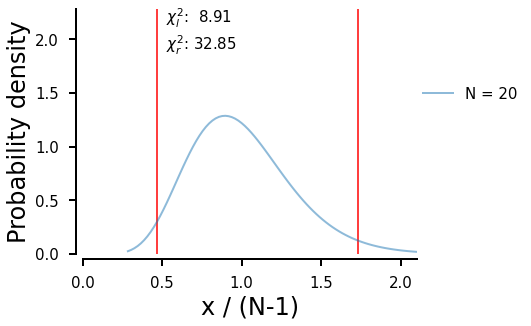

In [8]:
fig = plt.figure( figsize = (6, 4.5) )
ax = fig.add_subplot(1,1,1)
half_frame(ax, "x / (N-1)", "Probability density", font_size = my_font_size)

# mu, sigma = 0, 1.
# x1 = np.linspace(norm.ppf(0.001, mu, sigma), norm.ppf(0.999, mu, sigma), num = 100)
# rv = norm(mu, sigma)
# sub1.plot(x1, rv.pdf(x1), linewidth = 3, alpha = 0.5, label = "standard normal")

N = 20
x1 = np.linspace(stats.chi2.ppf(0.001, N-1), stats.chi2.ppf(0.999, N-1), num = 100)
f_x = stats.chi2(N-1)

x_u5 = stats.chi2.ppf(1-0.05/2, N-1)
x_l5 = stats.chi2.ppf(1-(1-0.05/2), N-1)
my_text = f'$\\chi^2_l$: {x_l5:5.2f} \n$\\chi_r^2$: {x_u5:5.2f}'



# Plot pdf
# ax.plot(x1, f_x.pdf(x1), linewidth = 2, alpha = 0.5, label = f'N = {N}')
# ax.text(10, 0.1, my_text, fontsize = my_font_size)
# ax.vlines([x_l5, x_u5], 0.0, 0.12, colors = ['r', 'r'])
# ax.set_xlim(0, 20)
# ax.set_ylim(0, .120)

ax.plot(x1/(N-1), (N-1)*f_x.pdf(x1), linewidth = 2, alpha = 0.5, label = f'N = {N}')
ax.text(10/(N-1), (N-1)*0.1, my_text, fontsize = my_font_size)
ax.vlines([x_l5/(N-1), x_u5/(N-1)], 0.0, (N-1)*0.12, colors = ['r', 'r'])
ax.set_xlim(0, 40/(N-1))
ax.set_ylim(0, (N-1)*0.120)

# Format legend
ax.legend(loc = (1.0, 0.6), frameon = False, markerscale = 1.8, fontsize = my_font_size)
plt.show()

#### Test of a Bernoulli process proportion 

The test statistic $Z_0 = \frac{X - np_0}{\sqrt{np_0(1-p_0)}}$, for $np_0 \gg 1$  follows a standard normal distribution, $N(0, 1)$.  Thus, for a two-sided alternative hypothesis, the p-value is

$~~~~~~~P = 2\left( 1 - \Phi(|z_0|)\right)$

where $\Phi$ is the standard cumulative normal distribution.  We would fail to reject the null hypothesis at the $\alpha$ significance level for a two-sided alternative hypothesis if 

$~~~~~~~-z_{\alpha/2} \lt z_0 \lt z_{\alpha/2}$

If $np_0$ is not much greater than 1, then we cannot use the normal approximation and must calculate the probability for a binomial with parameters $n$ and $p$.


In [ ]:
# Consider a binomial process with n = 5 and p = 0.1, 
# What would be the range of values of X (number of observed events) for which 
#   we could not reject the null hypothesis at a significance level of 0.05?



## Type II error and the selection of sample sizes

A type II error is when we cannot reject the null hypothesis but should.  This typically happens when the true parameter falls within the $\alpha$ significance level confidence interval.  The power of a statistical test is, you will recall, $1- \beta$.  

Consider a random normal process with unknown mean and known variance, and we want to test the null hypothesis that $\mu = \mu_0$.  Assume that, in reality, $\mu = \mu_0 + \delta$, where $\delta$ is the effect size.   Let us assume $\delta > 0$ for concreteness.


The power of the analysis is 0.851


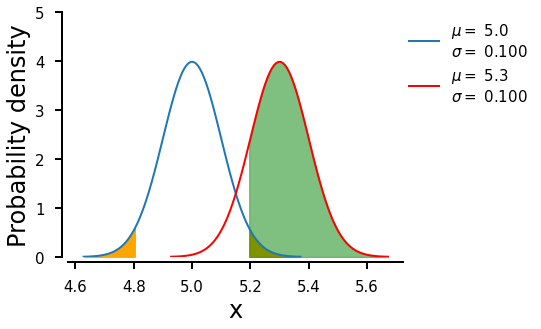

In [10]:
## Making delta smaller will decrease statistical power, 
## making sample size larger will increase statistical power

alpha = 0.05
sample_size = 100
sigma = 1. / np.sqrt(sample_size)
mu0 = 5. 
delta = 0.3

fig = plt.figure( figsize = (6, 4.5) )
ax = fig.add_subplot(1,1,1)
half_frame(ax, "x", "Probability density", font_size = my_font_size)
ax.set_ylim(0, 5)

# Null hypothesis
x = np.linspace(stats.norm.ppf(0.0001, mu0, sigma), stats.norm.ppf(0.9999, mu0, sigma), num = 100)
f_x = stats.norm(mu0, sigma)

# Plot pdf
ax.plot(x, f_x.pdf(x), linewidth = 2, alpha = 1, label = f'$\mu = $ {mu0}\n$\sigma = $ {sigma:.3f}')

# Shade region for which we reject null hypothesis
x_left = np.linspace(stats.norm.ppf(0.0001, mu0, sigma), stats.norm.ppf(alpha/2., mu0, sigma), num = 100)
ax.fill_between(x_left, f_x.pdf(x_left), 0, color = 'orange')
x_right = np.linspace(stats.norm.ppf(1-alpha/2., mu0, sigma), stats.norm.ppf(0.9999, mu0, sigma), num = 100)
ax.fill_between(x_right, f_x.pdf(x_right), 0, color = 'orange')

# Alternative hypothesis
mu1 = mu0 + delta
x2 = np.linspace(stats.norm.ppf(0.0001, mu1, sigma), stats.norm.ppf(0.9999, mu1, sigma), num = 100)
f_x2 = stats.norm(mu1, sigma)

# Plot pdf
ax.plot(x2, f_x2.pdf(x2), 'red', linewidth = 2, alpha = 1, label = f'$\mu = $ {mu1}\n$\sigma = $ {sigma:.3f}')

# # Shade region for which we reject null hypothesis
x_right = np.linspace(stats.norm.ppf(1.-alpha/2., mu0, sigma), stats.norm.ppf(0.9999, mu1, sigma), num = 100)
ax.fill_between(x_right, f_x2.pdf(x_right), 0, color = 'green', alpha = 0.5)

print(f"The power of the analysis is {f_x2.sf(stats.norm.ppf(1-alpha/2., mu0, sigma)):.3f}")

# Format legend
ax.legend(loc = (1.0, 0.6), frameon = False, markerscale = 1.8, fontsize = my_font_size)
plt.show()

The probability that we can reject the null hypothesis at the $\alpha$ signficance level is the area shaded in green.  We thus want the integral of the red curve from the the cutoff given by the statistical significance up to infinity.

$~~~~~~~~~Power = 1 - \int_{x_{cutoff}}^{\infty} \phi(x; \mu +\delta, \sigma)dx$ .

We can see from the graph that $x_{cutoff} = \mu + \frac{z_{\alpha/2}~\sigma}{\sqrt n}$. Making the change of variables 

$~~~~~~~~~y = \frac{(x - \mu) \sqrt n}{\sigma}  $

in order to express the integral in terms of a standard normal, we get $y_{\rm cutoff} = \frac{\left( \mu + \frac{z_{\alpha/2}~\sigma}{\sqrt n} - \mu - \delta \right) \sqrt n}{\sigma} = z_{\alpha/2} - \frac{\delta \sqrt n}{\sigma}$:

$~~~~~~~~~Power = 1 - \Phi\left(z_{\alpha/2} - \frac{\delta \sqrt n}{\sigma} \right)$

and if follows that 

$~~~~~~~~~\beta = \Phi\left(z_{\alpha/2} - \frac{\delta \sqrt n}{\sigma} \right)$


which provides an equation that we can solve (assuming that $\alpha$ cannot be changed):

1. for $n$ given the desired value of $\beta$, the expect value of $\delta$, and the process value for $\sigma$;


2. for $\beta$ given the value of $n$, the expect value of $\delta$, and the process value for $\sigma$;


3. for $\delta$ given the desired value of $\beta$, the practical limit for $n$, and the process value for $\sigma$.
